# A Brief Investigation of Fraction Approximations to Pi

*Xiuwen Tu*<br>
_2021.10_

Pi is an important and interesting number. Because of the sustained interest, the number of decimal digits computed has been going through the rough, as shown in the next graph from Wikipedia: 

![Record approximations of pi](https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Record_pi_approximations.svg/1920px-Record_pi_approximations.svg.png)

The above graph was created by Nageh in 2012. In recent years, there were at least these 3 new records: 
- 2019/3/14: 31.4E12 digits
- 2020/1/29: 50E12 digits
- 2021/8/5: 62.8E12 digits 

## Best fraction approximations of pi 

I got interested in pi and I was learning py. So I asked myself these two questions: 

#### What are good fraction approximations of pi? 
#### What python features are useful in this investigation? 

In [1]:
import math
from decimal import *
from fractions import Fraction

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set the precision to a couple of digits more than the pi with 50 digits after the decimal  point
DefaultContext.prec = 52
setcontext(DefaultContext)

In [3]:
math.pi

3.141592653589793

In [4]:
np.pi

3.141592653589793

In [5]:
math.pi == np.pi

True

In [6]:
math.pi.as_integer_ratio()

(884279719003555, 281474976710656)

### First, use Decimal to define pi_50 with 50 correct decimal digits

In [7]:
# First 50 digits of pi from https://en.wikipedia.org/wiki/Pi
pi_50_str = '3.14159265358979323846264338327950288419716939937510'    
len(pi_50_str)

52

In [8]:
getcontext().prec

52

In [9]:
pi_50 = Decimal(pi_50_str)
pi_50

Decimal('3.14159265358979323846264338327950288419716939937510')

In [10]:
def rel_pi_error(pi_approx): 
    return (Decimal(pi_approx) - pi_50) / pi_50

In [11]:
rel_pi_error(math.pi)

Decimal('-3.898171832519375446564363917609879351118886247457677E-17')

In [12]:
# this is exact, but not much insight
pi_50.as_integer_ratio()

(31415926535897932384626433832795028841971693993751,
 10000000000000000000000000000000000000000000000000)

### Next, use Fraction to obtain fraction approximations of pi_50 

In [13]:
Fraction(pi_50)

Fraction(31415926535897932384626433832795028841971693993751, 10000000000000000000000000000000000000000000000000)

In [14]:
# this is a useful one 
Fraction(pi_50).limit_denominator()    #  the default max_denominator is 1000000)

Fraction(3126535, 995207)

In [15]:
data_list = []
for i in range(2,90): 
    max_denom = 2**i
    t = Fraction(pi_50).limit_denominator(max_denom).as_integer_ratio()
    error = (Decimal(t[0])/Decimal(t[1]) - pi_50) / pi_50
    data_list.append((max_denom, error))
    print(f'max denom: 2**{i} or {2**i},\t\t approx ratio: {t},\t\t error: {error:.1e}')

max denom: 2**2 or 4,		 approx ratio: (13, 4),		 error: 3.5e-2
max denom: 2**3 or 8,		 approx ratio: (22, 7),		 error: 4.0e-4
max denom: 2**4 or 16,		 approx ratio: (22, 7),		 error: 4.0e-4
max denom: 2**5 or 32,		 approx ratio: (22, 7),		 error: 4.0e-4
max denom: 2**6 or 64,		 approx ratio: (201, 64),		 error: -3.1e-4
max denom: 2**7 or 128,		 approx ratio: (355, 113),		 error: 8.5e-8
max denom: 2**8 or 256,		 approx ratio: (355, 113),		 error: 8.5e-8
max denom: 2**9 or 512,		 approx ratio: (355, 113),		 error: 8.5e-8
max denom: 2**10 or 1024,		 approx ratio: (355, 113),		 error: 8.5e-8
max denom: 2**11 or 2048,		 approx ratio: (355, 113),		 error: 8.5e-8
max denom: 2**12 or 4096,		 approx ratio: (355, 113),		 error: 8.5e-8
max denom: 2**13 or 8192,		 approx ratio: (355, 113),		 error: 8.5e-8
max denom: 2**14 or 16384,		 approx ratio: (355, 113),		 error: 8.5e-8
max denom: 2**15 or 32768,		 approx ratio: (102928, 32763),		 error: -1.1e-9
max denom: 2**16 or 65536,		 approx ratio: (104

### A couple of observations in the above results: 
- The allowed max denominator exceeded 2**64 without problem. 
- The relative error exhausted the 50 decimal-digit precision we had in pi_50

In [16]:
# print the max_denom in scientific notation to have a little tidier output 
data_list = []
for i in range(2,90): 
    max_denom = 2**i
    t = Fraction(pi_50).limit_denominator(max_denom).as_integer_ratio()
    error = (Decimal(t[0])/Decimal(t[1]) - pi_50) / pi_50
    data_list.append((max_denom, error))
    print(f'max denom: 2**{i} or ~{2**i:.1e},\t\t approx ratio: {t},\t\t error: {error:.1e}')

max denom: 2**2 or ~4.0e+00,		 approx ratio: (13, 4),		 error: 3.5e-2
max denom: 2**3 or ~8.0e+00,		 approx ratio: (22, 7),		 error: 4.0e-4
max denom: 2**4 or ~1.6e+01,		 approx ratio: (22, 7),		 error: 4.0e-4
max denom: 2**5 or ~3.2e+01,		 approx ratio: (22, 7),		 error: 4.0e-4
max denom: 2**6 or ~6.4e+01,		 approx ratio: (201, 64),		 error: -3.1e-4
max denom: 2**7 or ~1.3e+02,		 approx ratio: (355, 113),		 error: 8.5e-8
max denom: 2**8 or ~2.6e+02,		 approx ratio: (355, 113),		 error: 8.5e-8
max denom: 2**9 or ~5.1e+02,		 approx ratio: (355, 113),		 error: 8.5e-8
max denom: 2**10 or ~1.0e+03,		 approx ratio: (355, 113),		 error: 8.5e-8
max denom: 2**11 or ~2.0e+03,		 approx ratio: (355, 113),		 error: 8.5e-8
max denom: 2**12 or ~4.1e+03,		 approx ratio: (355, 113),		 error: 8.5e-8
max denom: 2**13 or ~8.2e+03,		 approx ratio: (355, 113),		 error: 8.5e-8
max denom: 2**14 or ~1.6e+04,		 approx ratio: (355, 113),		 error: 8.5e-8
max denom: 2**15 or ~3.3e+04,		 approx ratio: (102928, 327

In [17]:
len(data_list)

88

In [18]:
data_list

[(4, Decimal('0.03450713009731968249774446192134335322398769731296883')),
 (8, Decimal('0.0004024994347706819758407983415188470737463446542995769')),
 (16, Decimal('0.0004024994347706819758407983415188470737463446542995769')),
 (32, Decimal('0.0004024994347706819758407983415188470737463446542995769')),
 (64, Decimal('-0.0003080137040324222016988613163941634710503501927560790')),
 (128, Decimal('8.491367865837086258402199289419881724314800266685508E-8')),
 (256, Decimal('8.491367865837086258402199289419881724314800266685508E-8')),
 (512, Decimal('8.491367865837086258402199289419881724314800266685508E-8')),
 (1024, Decimal('8.491367865837086258402199289419881724314800266685508E-8')),
 (2048, Decimal('8.491367865837086258402199289419881724314800266685508E-8')),
 (4096, Decimal('8.491367865837086258402199289419881724314800266685508E-8')),
 (8192, Decimal('8.491367865837086258402199289419881724314800266685508E-8')),
 (16384, Decimal('8.491367865837086258402199289419881724314800266685508E-8'

In [19]:
# drop the last 7 with questionable precisions
data_list = data_list[:-7]
data_list

[(4, Decimal('0.03450713009731968249774446192134335322398769731296883')),
 (8, Decimal('0.0004024994347706819758407983415188470737463446542995769')),
 (16, Decimal('0.0004024994347706819758407983415188470737463446542995769')),
 (32, Decimal('0.0004024994347706819758407983415188470737463446542995769')),
 (64, Decimal('-0.0003080137040324222016988613163941634710503501927560790')),
 (128, Decimal('8.491367865837086258402199289419881724314800266685508E-8')),
 (256, Decimal('8.491367865837086258402199289419881724314800266685508E-8')),
 (512, Decimal('8.491367865837086258402199289419881724314800266685508E-8')),
 (1024, Decimal('8.491367865837086258402199289419881724314800266685508E-8')),
 (2048, Decimal('8.491367865837086258402199289419881724314800266685508E-8')),
 (4096, Decimal('8.491367865837086258402199289419881724314800266685508E-8')),
 (8192, Decimal('8.491367865837086258402199289419881724314800266685508E-8')),
 (16384, Decimal('8.491367865837086258402199289419881724314800266685508E-8'

### Now, visualize the results by plotting relative error vs max denominator

In [20]:
# separate the ones with positive errors from those with negative errors  
pos_data_list = [t for t in data_list if t[1].compare(Decimal(0))==Decimal('1')]
pos_denom_list = [t[0] for t in pos_data_list]
pos_error_list = [t[1] for t in pos_data_list]

# for negative errors, multiple by Decimal(-1) so that they show up in log plot
neg_data_list = [t for t in data_list if t[1].compare(Decimal(0))==Decimal('-1')]
neg_denom_list = [t[0] for t in neg_data_list]
neg_error_list = [t[1]*Decimal(-1) for t in neg_data_list]

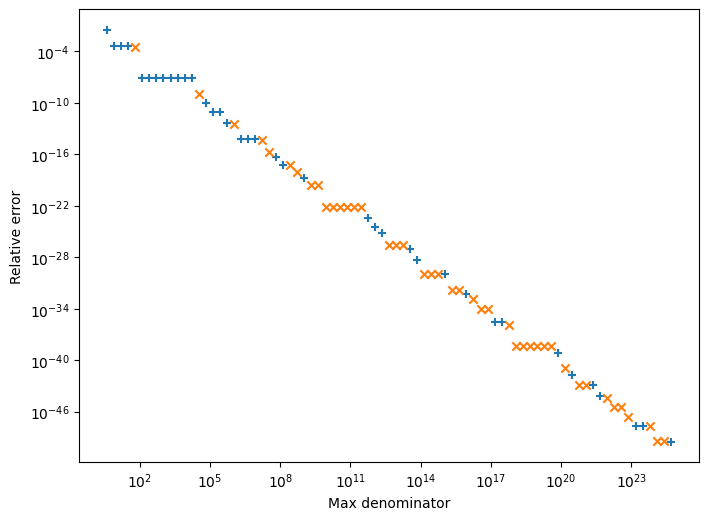

In [21]:
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(pos_denom_list, pos_error_list, marker='+')
plt.scatter(neg_denom_list, neg_error_list, marker='x')
ax = plt.gca()
ax.set_ylabel('Relative error')
ax.set_yscale('log')
ax.set_xlabel('Max denominator')
ax.set_xscale('log')

#### A few fraction approximations are good over a sizable range of max denominator 
Two notable ones are 22/7 and 355/113. 

### Let's check out the accuracy of 355/113 and 22/7 
BTW, 355/113 is known as Zu's ratio, named after Zu Chongzhi (祖冲之), a Chinese mathematician in the 5th century

In [22]:
# In case we need a simple approximation to pi (but don't want to use math.pi or np.pi), we can use 355/113
pi_zu = 355/113    
rel_pi_error(pi_zu)

Decimal('8.491367872842437769196965574924013843988360761753236E-8')

#### 355/113 works out to have accuracy of 85 ppb, impressive

In [23]:
rel_pi_error(22/7)

Decimal('0.0004024994347706617818428207953813403909165098810256213')

#### 22/7 works out to have accuracy of 402 ppm, not bad

### Finally, let's look into the continued fraction representation of pi 
Here is an image of the formula for the simple continued fraction from Wikipedia: 

![Image of Continued Fraction](https://wikimedia.org/api/rest_v1/media/math/render/svg/e294255007892e9424e6d3f49183cad6b133bbcf)

Let's define a recursive function to compute the truncated first 20 terms. 

In [24]:
#  The fist 20 terms from https://mathworld.wolfram.com/PiContinuedFraction.html 
pi_cf_20 = (3, 7, 15, 1, 292, 1, 1, 1, 2, 1, 3, 1, 14, 2, 1, 1, 2, 2, 2, 2)

def cont_fract(cf_tuple): 
    if len(cf_tuple)==1: 
        return cf_tuple[0]
    elif len(cf_tuple)==2: 
        return cf_tuple[0] + Fraction(1,cf_tuple[1])
    elif len(cf_tuple)>2: 
        x = cf_tuple[-2] + Fraction(1,cf_tuple[-1])
        new_cf_list = list(cf_tuple[:-2])
        new_cf_list.append(x)
        return cont_fract(tuple(new_cf_list))        
    else: 
        print(f'Something is wrong. Unexpected len(cf_tuple): \t{len(cf_tuple)}')
        return null 

for i in range(1,len(pi_cf_20)): 
    print(cont_fract(pi_cf_20[:i]))

3
22/7
333/106
355/113
103993/33102
104348/33215
208341/66317
312689/99532
833719/265381
1146408/364913
4272943/1360120
5419351/1725033
80143857/25510582
165707065/52746197
245850922/78256779
411557987/131002976
1068966896/340262731
2549491779/811528438
6167950454/1963319607


#### Not surprisingly, 22/7 and 355/113 are found here as well. 

### Wrap up
After this brief investigation, here are my answers to the questions I asked earlier: 
#### What are good fraction approximations of pi? 
- 355/113, Zu's ratio (accuracy 85 ppb)
- 22/7 (accuracy 402 ppm)

#### What python features are useful and fun in this investigation? 
- Decimal 
- Fraction 
- int 